In [48]:
# In this section, we're gonna builda kernel density estimation
# Firstly, import the 'numpy' and 'matplotlib.pyplot' packages
import numpy as np
import matplotlib.pyplot as plt
import math

def ker_smoothing(X, k):
    X = np.sort(X)
    # Compute the range of data vector
    X_min = X[0]
    X_max = X[-1]
    data_points = np.linspace(X_min, X_max, 1000)
    result = np.zeros((1000,))
    if k != 'Uniform' and k != 'Epan' and k != 'Biweight' and k != 'Triweight' and k != 'Gaussian':
        return "Name of the kernel is incorrect!!!"
    else:    
        def ker_density(point, X, k):        
            # Compute the necessary quantities
            sig = np.std(X)
            n = len(X)
            # Next, we construct the functions of kernels
            c = np.array([1.843, 2.345, 2.778, 3.154, 1.059])
            band = c*sig*n**(-1/5)
            matrix = np.array([X,X,X,X,X])
            matrix = matrix.transpose()
            reg_vec = (matrix - point)/band
            def K(x, k):
                vec = np.zeros((n,))
                for i, xi in enumerate(x):
                    if abs(xi) > 1:
                        vec[i] = 0
                    else:
                        if k == 'Uniform':
                            vec[i] = 1/2
                        elif k == 'Epan':
                            vec[i] = 3/4*(1-xi**2)
                        elif k == 'Biweight':
                            vec[i] = 15/16*(1-xi**2)**2
                        elif k == 'Triweight':
                            vec[i] = 35/32*(1-xi**2)**3
                        elif k == 'Gaussian':
                            vec[i] = 1/math.sqrt(2*np.pi)*math.exp(-1/2*xi**2)
                return vec
            value = np.zeros((reg_vec.shape[0],reg_vec.shape[1]))
            type_kernel = ["Uniform", "Epan", "Biweight", "Triweight", "Gaussian"]
            for j in range(0, reg_vec.shape[1]-1):
                value[:,j] = K(reg_vec[:,j], type_kernel[j])
            pdf = np.sum(value, axis = 0)
            if k == 'Uniform':
                return pdf[0]
            elif k == 'Epan':
                return pdf[1]
            elif k == 'Biweight':
                return pdf[2]
            elif k == 'Triweight':
                return pdf[3]
            elif k == 'Gaussian':
                return pdf[4]
    for i, l in enumerate(data_points):
        result[i] = ker_density(l, X, k)
    fig = plt.figure
    _ = plt.plot(data_points, result)
    return fig

In [45]:
# In this cell, we will use the data of Yahoo Finance about companies on NASDAQ to investigate the market capitalization 
# as well as of these companies using the kernel density estimator we just constructed.
import csv

f = open('nasdaq-companylist.csv','r')
f_data = csv.reader(f)
data = []
for i in f_data:
    data.append(i)

header = data[0]
data = data[1:]

# So, now, we extract the information of market capitalisation, "MarketCap", and the sale, "LastSale"
# Index of "MarketCap" and "LastSale" variables:
MarCap_index = header.index("MarketCap")
Sale_index = header.index("LastSale")

# Firstly, we deal with the missing values in both "MarketCap" and "LastSale" variables by eliminate them out of the data set

mar_cap = []
sale = []
for i in data:
    a_marcap = i[MarCap_index]
    a_sale = i[Sale_index]
    # Since the scale of market capitalisation is in million or billion, we have to convert them into the same scale, billion
    if a_sale == "n/a" or a_sale == " " or a_marcap == "n/a" or a_marcap == " ":
        data.remove(i)
    elif a_marcap[-1] == "M":
        mar_cap.append(float(a_marcap[1:len(a_marcap)-1])/1000)
    elif a_marcap[-1] == "B":
        mar_cap.append(float(a_marcap[1:len(a_marcap)-1]))
        sale.append(float(a_sale))

# Convert "mar_cap" and "sale" lists into arrays
marcap_array = np.array(mar_cap)
sale_array = np.array(sale)

# Provide some insight of market capitalisation variable
mean_marcap = np.mean(marcap_array)
median_marcap = np.median(marcap_array)
std_marcap = np.std(marcap_array)
min_marcap = np.amin(marcap_array)
max_marcap = np.amax(marcap_array)

dic_marcap = {
    "Mean": mean_marcap,
    "Median": median_marcap,
    "Standard Deviation": std_marcap,
    "Min": min_marcap,
    "Max": max_marcap
}

print(dic_marcap)

# Look at the dictionary, we can see that it is more likely there are some outliers in our "MarketCap" variable
# Sine, the maximum is much higher than the median. As a result, these outliers could stretch the mean far away from the median
# So, we will discard the outliers by trimming off the first and the last 1%

length_marcap = len(marcap_array)
# Sort the variable
sort_marcap = np.sort(marcap_array)
new_marcap = sort_marcap[math.floor(0.01*length_marcap):math.ceil(0.99*length_marcap)]

# Check again
mean_new_marcap = np.mean(new_marcap)
median_new_marcap = np.median(new_marcap)
std_new_marcap = np.std(new_marcap)
min_new_marcap = np.amin(new_marcap)
max_new_marcap = np.amax(new_marcap)

dic_new_marcap = {
    "Mean": mean_new_marcap,
    "Median": median_new_marcap,
    "Standard Deviation": std_new_marcap,
    "Min": min_new_marcap,
    "Max": max_new_marcap
}
print(dic_new_marcap)

# Do the same process with "LastSale" variable
# Provide some insight of market capitalisation variable
mean_sale = np.mean(sale_array)
median_sale = np.median(sale_array)
std_sale = np.std(sale_array)
min_sale = np.amin(sale_array)
max_sale = np.amax(sale_array)

dic_sale = {
    "Mean": mean_sale,
    "Median": median_sale,
    "Standard Deviation": std_sale,
    "Min": min_sale,
    "Max": max_sale
}

print(dic_sale)

# Look at the dictionary, we can see that it is more likely there are some outliers in our "LastSale" variable
# Sine, the maximum is much higher than the median. As a result, these outliers could stretch the mean far away from the median
# So, we will discard the outliers by trimming off the first and the last 1%

length_sale = len(sale_array)
# Sort the variable
sort_sale = np.sort(sale_array)
new_sale = sort_sale[math.floor(0.01*length_sale):math.ceil(0.99*length_sale)]

# Check again
mean_new_sale = np.mean(new_sale)
median_new_sale = np.median(new_sale)
std_new_sale = np.std(new_sale)
min_new_sale = np.amin(new_sale)
max_new_sale = np.amax(new_sale)

dic_new_sale = {
    "Mean": mean_new_sale,
    "Median": median_new_sale,
    "Standard Deviation": std_new_sale,
    "Min": min_new_sale,
    "Max": max_new_sale
}
print(dic_new_sale)

{'Mean': 3.1503183509282855, 'Median': 0.29222000000000004, 'Standard Deviation': 23.052181778776475, 'Min': 0.0011200000000000001, 'Max': 563.68}
{'Mean': 1.5851910620126253, 'Median': 0.29222000000000004, 'Standard Deviation': 4.298413369400805, 'Min': 0.00282, 'Max': 46.84}
{'Mean': 56.39655918918919, 'Median': 39.8, 'Standard Deviation': 67.06118878349899, 'Min': 2.855, 'Max': 753.22}
{'Mean': 52.00209201101928, 'Median': 39.8, 'Standard Deviation': 41.924247478345464, 'Min': 5.45, 'Max': 330.22}


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

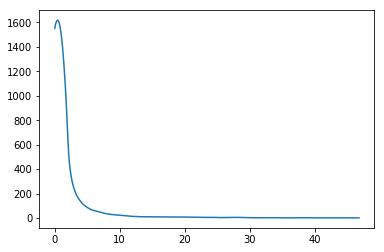

In [50]:
# Now, apply the kernel smoothing estimator to new_marcap variable and check the result
# We're gonna use the Epanechnikov kernel
ker_smoothing(new_marcap, "Epan")

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

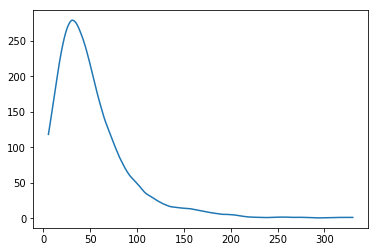

In [51]:
# Now, apply the kernel smoothing estimator to new_marcap variable and check the result
# We're goona use the Epanechnikov kernel
ker_smoothing(new_sale, "Epan")

In [53]:
# Now, one more question rises is, what is the difference in market capitalisation and sale between the industries
# To this end, we will split the data set in to many sub data sets, each of them represent the data of each industry

# Check the data after cleaning
print(header)
print(data)

['Symbol', 'Name', 'LastSale', 'MarketCap', 'IPOyear', 'Sector', 'industry', 'Summary Quote', '']
[['PIH', '1347 Property Insurance Holdings, Inc.', '7.2', '$43.39M', '2014', 'Finance', 'Property-Casualty Insurers', 'http://www.nasdaq.com/symbol/pih', ''], ['FLWS', '1-800 FLOWERS.COM, Inc.', '10', '$650.11M', '1999', 'Consumer Services', 'Other Specialty Stores', 'http://www.nasdaq.com/symbol/flws', ''], ['FCCY', '1st Constitution Bancorp (NJ)', '13.75', '$109.35M', 'n/a', 'Finance', 'Savings Institutions', 'http://www.nasdaq.com/symbol/fccy', ''], ['SRCE', '1st Source Corporation', '39.825', '$1.03B', 'n/a', 'Finance', 'Major Banks', 'http://www.nasdaq.com/symbol/srce', ''], ['VNET', '21Vianet Group, Inc.', '7.27', '$827.69M', '2011', 'Technology', 'Computer Software: Programming, Data Processing', 'http://www.nasdaq.com/symbol/vnet', ''], ['TWOU', '2U, Inc.', '34.61', '$1.63B', '2014', 'Technology', 'Computer Software: Prepackaged Software', 'http://www.nasdaq.com/symbol/twou', ''], 